In [4]:
# Importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as pl
#import seaborn as sns

In [5]:
## Reading .csv files
df = pd.read_csv("data/corrected.csv",sep=',',header=None)

## Defining columns
col_names = pd.read_csv("data/column_names.csv",sep=',',header=None)[0].values
df.columns = col_names

## Identifying columns as categorical or not
categorical_columns = ["protocol_type","service","flag","land","logged_in","root_shell","su_attempted",
                       "is_host_login","is_guest_login","label"]
df_categorical = df[categorical_columns]
df_non_categorical = df.drop(categorical_columns, axis=1)

IOError: File data/column_names.csv does not exist

In [1]:
## A glance at the non categorical data
df_non_categorical.describe()

NameError: name 'df_non_categorical' is not defined

## Análise de variáveis discretas


### Relação entre Ataques e Serviços de Rede

Vamos começar analisando a relação entre o serviço de rede utilizado pelo destino dos pacotes e os ataques identificados. Para tal, vamos plotar um gráfico de barras que mostra o percentual de participação de cada serviço de rece em cada ataque.

De modo a facilitar a visualização, vamos considerar apenas variáveis que representem ao menos 1% do percentual total de ataques ou tipos de serviço de rede.



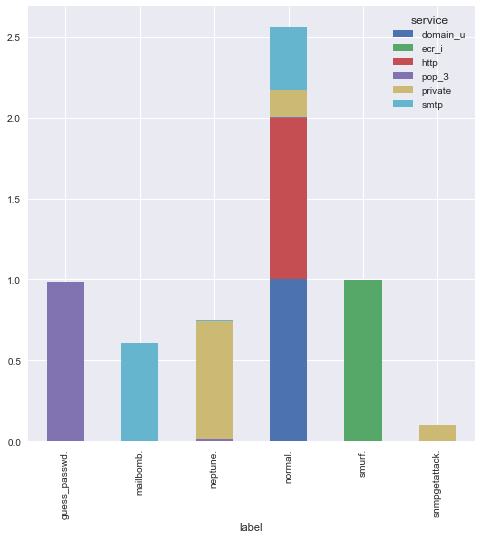

In [84]:
## Create a subset of main dataset (f_data) that contains only services and labels that represents at
## least 1% of the total cases

f_services = pd.crosstab(index=df["service"],columns="count")
f_services = f_services/len(df)
f_services = f_services[f_services["count"] > 0.01]

f_attacks = pd.crosstab(index=df["label"],columns="count")
f_attacks = f_attacks/len(df)
f_attacks = f_attacks[f_attacks["count"] > 0.01]

f_data = df[df['service'].isin(list(f_services.index))]
f_data = f_data[f_data['label'].isin(list(f_attacks.index))]


attack_data = pd.crosstab(index = f_data["label"], columns=f_data["service"])
frequency_table_attack = (attack_data/attack_data.sum())

frequency_table_attack.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True);

### Relação entre Ataques e Tipos de Protocolo

Utilizando a mesma abordagem anterior, iremos avalair o percentual de participcação de cada protocolo de rede em cada tipo de ataque.

O objetivo desse análise é visualziar se existe alguma característica que foge do conhecido pela literatura.

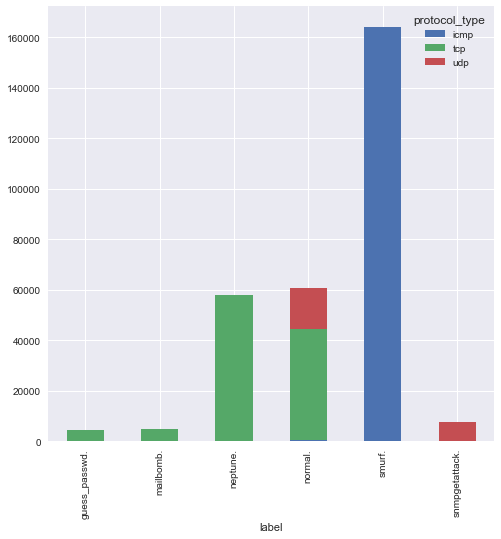

In [86]:
## Create a subset of main dataset (f_data) that contains only protocols and labels that represents at
## least 1% of the total cases

f_protocol = pd.crosstab(index=df["protocol_type"],columns="count")
f_protocol = f_protocol/len(df)
f_protocol = f_protocol[f_protocol["count"] > 0.01]

f_data = df[df['protocol_type'].isin(list(f_protocol.index))]
f_data = f_data[f_data['label'].isin(list(f_attacks.index))]

## Create a Two-Way Table

relationship_protocoal_attack = pd.crosstab(index=f_data["label"], 
                          columns=f_data["protocol_type"])
## Plot the Two-Way Table
relationship_protocoal_attack.plot(kind="bar", 
                 figsize=(8,8),
                 stacked=True);

### Participação percentual de cada tipo de protocolo de rede

O gráfico abaixo visa dar uma visão geral da participação de cada tipo de protocolo na rede na qual os dados foram coletados.

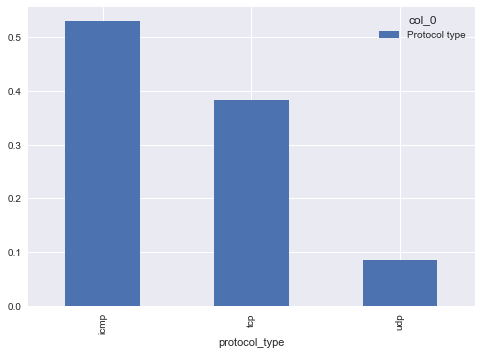

In [7]:
## Create a cross tab dataframe
protocol_data = pd.crosstab(index = df["protocol_type"],columns="Protocol type")
frequency_table_protocol = (protocol_data/protocol_data.sum())

## Plot the dataframe
frequency_table_protocol.plot.bar();

## Análise de variáveis contínuas

### Histogramas

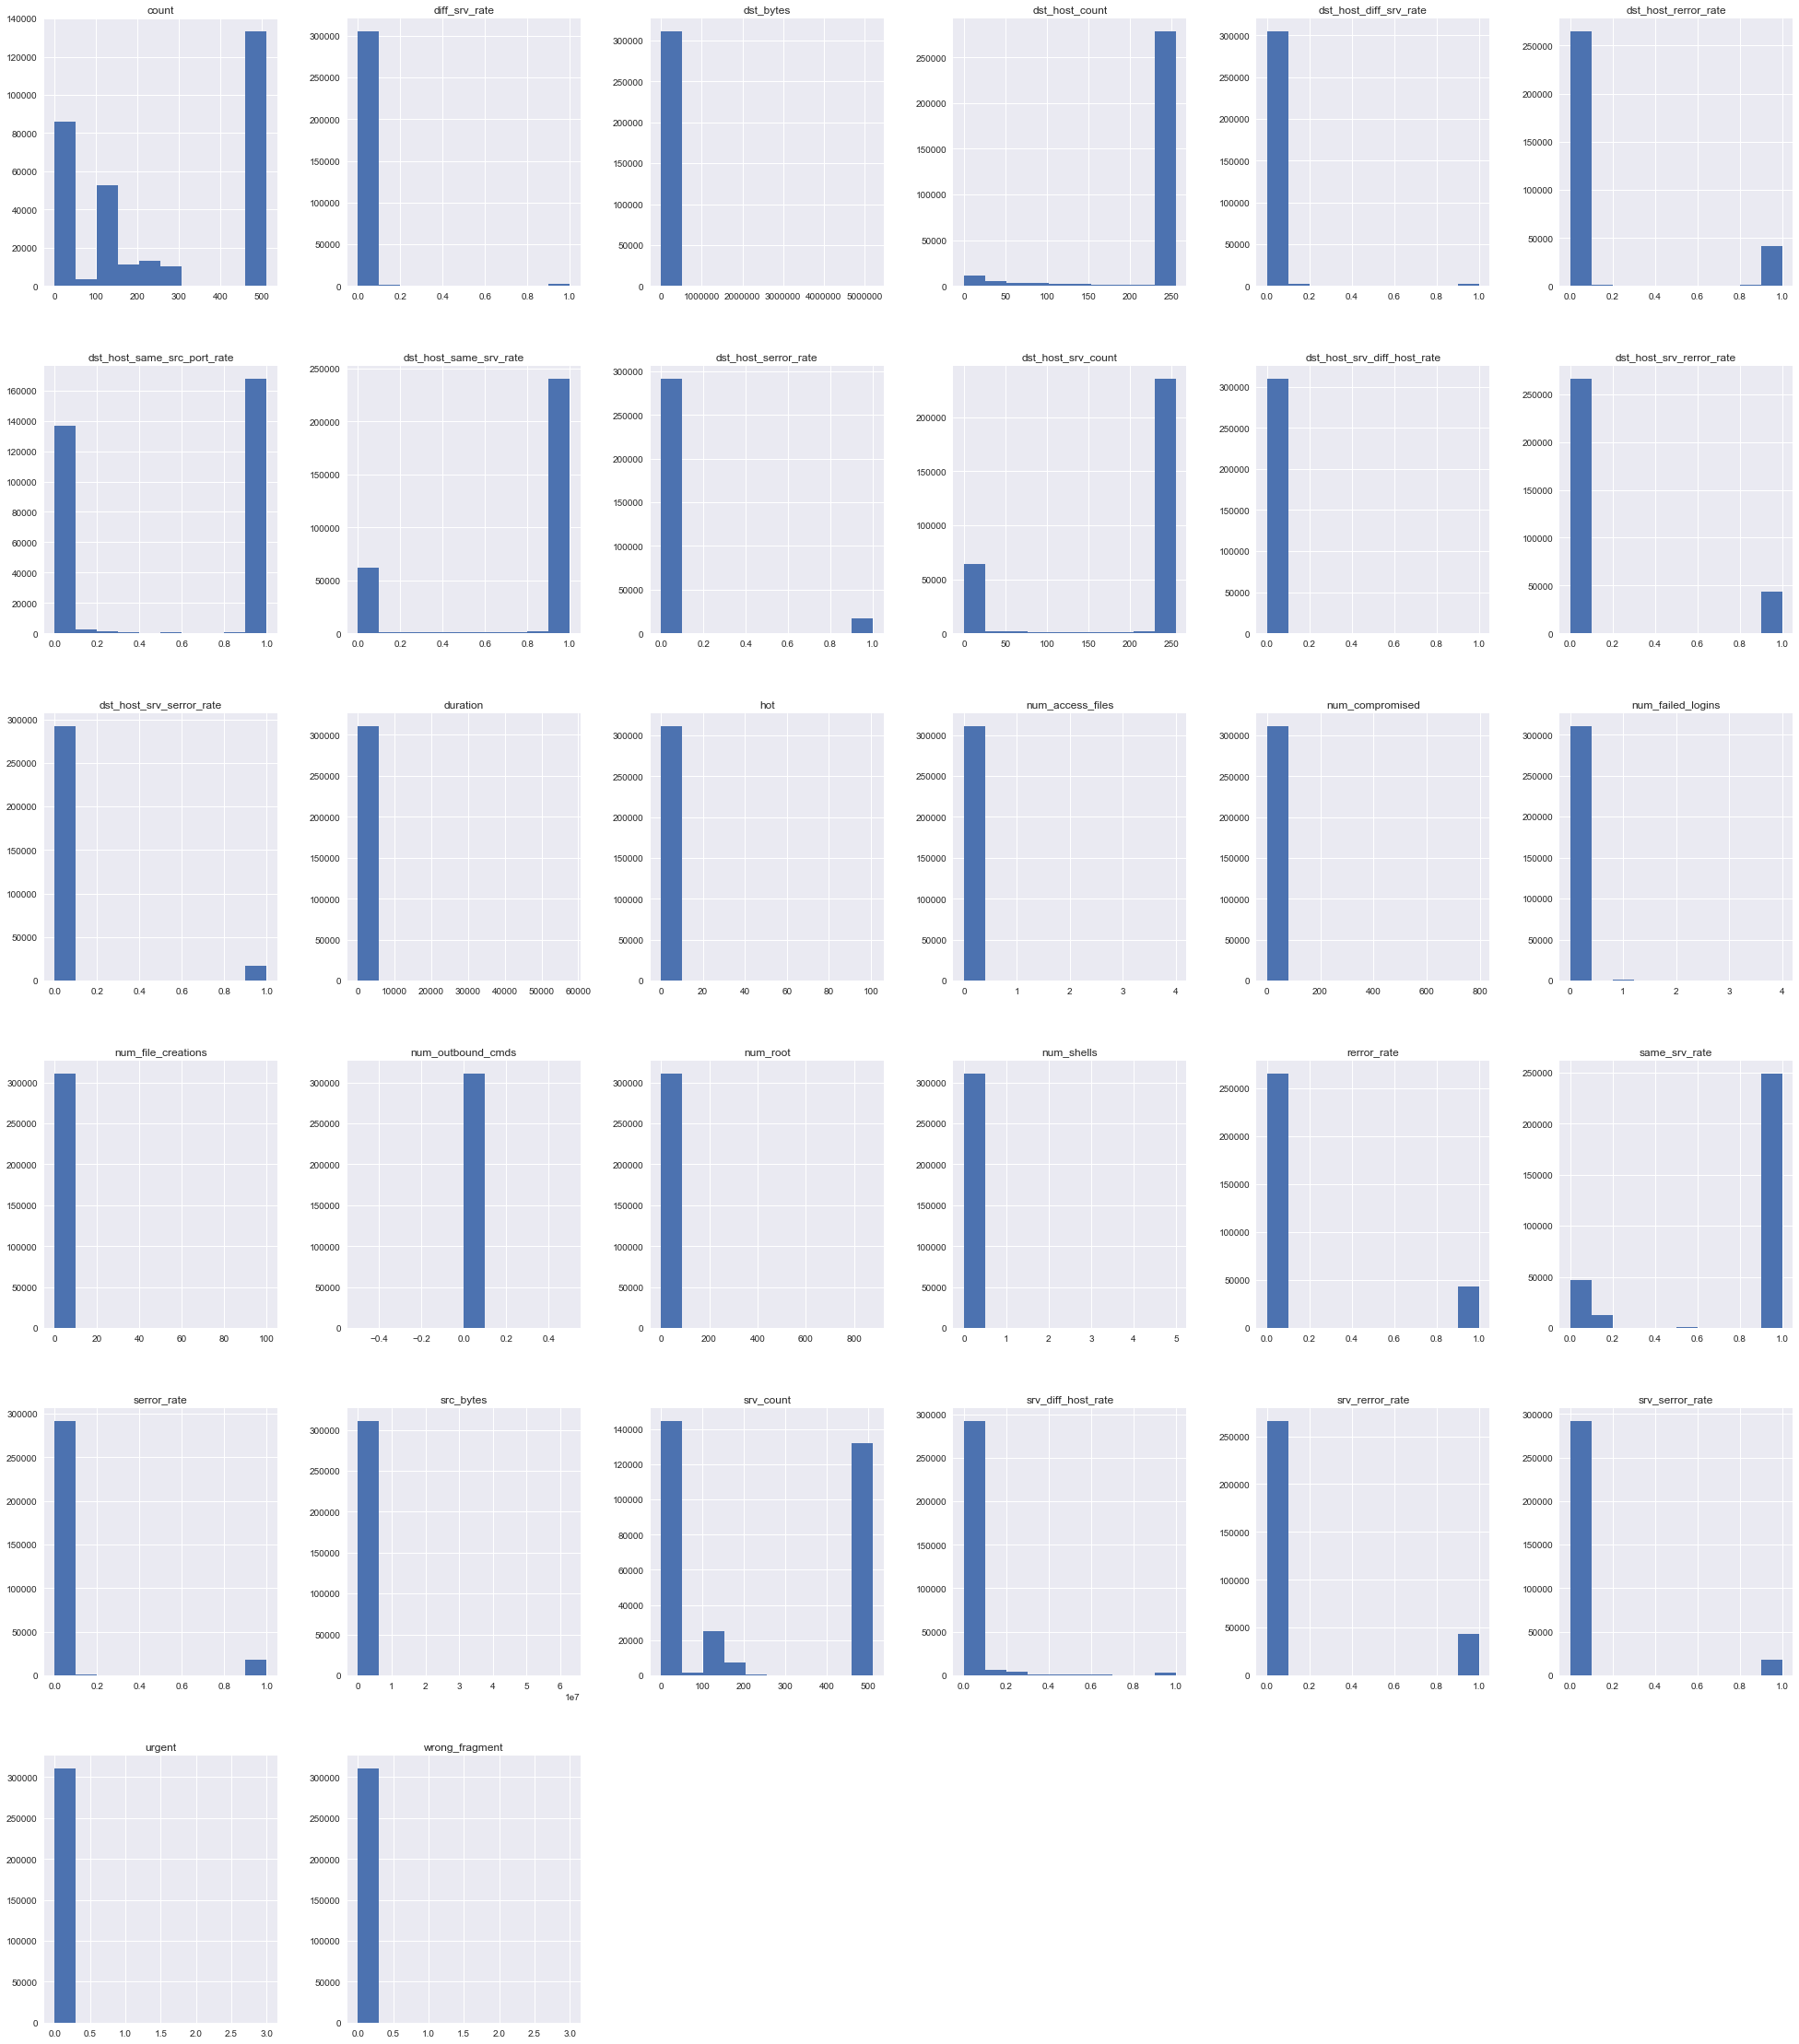

In [16]:
df_non_categorical.hist(figsize = (34,40));

### Matriz de correlação

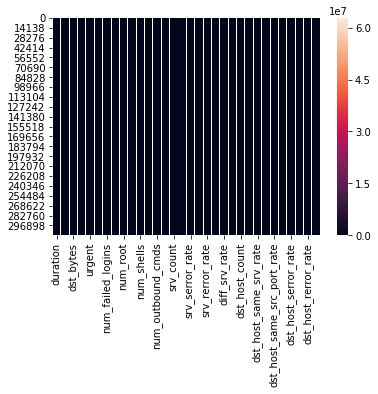

In [10]:
ax = sns.heatmap(df_non_categorical)
ax

# Análise de dados redundantes

De acordo com Tavallaee (2009), o grande número de registros redundantes pode enviesar os classificadores para os registros mais frequentes. Desssa forma, o autor propõe um novo dataset, removendo as duplicatas. Dessa forma, analisaremos o dataset KDD99 completo e o sem as duplicatas. Para tal analisaremos a razão entre os dados únicos e os duplicados e plotaremos os gráficos de relação entre os ataques e serviços, e entre os ataques e protocolos utilizados.

In [11]:
# Loading dataframe
df = pd.read_csv("data/corrected.csv",sep=',',header=None)

# Removing dupicates
df2 = df.drop_duplicates()
percentage = 1 - float(df2[0].count())/float(df[0].count())
print("O dataset sem duplicatas é {}% menor que o dataset original".format(percentage * 100))

O dataset sem duplicatas é 75.1499056358% menor que o dataset original


In [12]:
from sklearn import tree

In [39]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(df.iloc[:,:41], df[41])
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [26]:
df_nolabels = df.drop(df.columns[3], axis=1).iloc[:,:40]
df_nolabels

,0,1,2,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,0,udp,private,105,146,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
1,0,udp,private,105,146,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
2,0,udp,private,105,146,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
3,0,udp,private,105,146,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
4,0,udp,private,105,146,0,0,0,0,0,...,255,254,1.00,0.01,0.01,0.00,0.00,0.0,0.00,0.00
5,0,udp,private,105,146,0,0,0,0,0,...,255,255,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.00
6,0,udp,domain_u,29,0,0,0,0,0,0,...,10,3,0.30,0.30,0.30,0.00,0.00,0.0,0.00,0.00
7,0,udp,private,105,146,0,0,0,0,0,...,255,253,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00
8,0,udp,private,105,146,0,0,0,0,0,...,255,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
9,0,tcp,http,223,185,0,0,0,0,0,...,71,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00


In [30]:
c1 = df[1].unique()
c2 = df[2].unique()
c3 = df[3].unique()

In [35]:
d_protocol = {}
d_service = {}
d_wtver = {}
for i in range(len(c1)):
    d_protocol[c1[i]] = i

for i in range(len(c2)):
    d_service[c2[i]] = i
    
for i in range(len(c3)):
    d_wtver[c3[i]] = i
print (d_protocol)
print (d_service)
print (d_wtver)

{'udp': 0, 'icmp': 2, 'tcp': 1}
{'domain': 14, 'netbios_ssn': 56, 'Z39_50': 58, 'smtp': 3, 'urp_i': 29, 'private': 0, 'echo': 41, 'shell': 60, 'eco_i': 6, 'sunrpc': 22, 'ftp_data': 4, 'pm_dump': 36, 'pop_3': 16, 'pop_2': 32, 'systat': 24, 'ftp': 5, 'sql_net': 30, 'whois': 44, 'domain_u': 1, 'netbios_dgm': 55, 'efs': 61, 'remote_job': 27, 'daytime': 39, 'other': 7, 'finger': 12, 'ldap': 17, 'netbios_ns': 54, 'kshell': 63, 'iso_tsap': 40, 'ecr_i': 9, 'nntp': 53, 'printer': 23, 'http': 2, 'uucp_path': 52, 'courier': 38, 'exec': 59, 'tim_i': 25, 'netstat': 26, 'telnet': 15, 'gopher': 46, 'rje': 47, 'uucp': 34, 'link': 28, 'auth': 8, 'http_443': 21, 'csnet_ns': 51, 'X11': 11, 'IRC': 10, 'tftp_u': 33, 'imap4': 35, 'icmp': 64, 'supdup': 49, 'name': 19, 'nnsp': 37, 'mtp': 45, 'ntp_u': 20, 'bgp': 31, 'ctf': 48, 'hostnames': 50, 'klogin': 62, 'vmnet': 57, 'time': 13, 'discard': 42, 'login': 18, 'ssh': 43}
{'OTH': 10, 'RSTR': 1, 'S3': 4, 'S2': 7, 'S1': 2, 'S0': 6, 'RSTOS0': 8, 'REJ': 3, 'SH': 9, 

In [37]:
for i in d_protocol:
    df = df.replace(i, d_protocol[i])
for i in d_service:
    df = df.replace(i, d_service[i])
for i in d_wtver:
    df = df.replace(i, d_wtver[i])
df

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0,0,0,0,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal.
1,0,0,0,0,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal.
2,0,0,0,0,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal.
3,0,0,0,0,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,snmpgetattack.
4,0,0,0,0,105,146,0,0,0,0,...,254,1.00,0.01,0.01,0.00,0.00,0.0,0.00,0.00,snmpgetattack.
5,0,0,0,0,105,146,0,0,0,0,...,255,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.00,snmpgetattack.
6,0,0,1,0,29,0,0,0,0,0,...,3,0.30,0.30,0.30,0.00,0.00,0.0,0.00,0.00,normal.
7,0,0,0,0,105,146,0,0,0,0,...,253,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal.
8,0,0,0,0,105,146,0,0,0,0,...,254,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00,snmpgetattack.
9,0,1,2,0,223,185,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00,normal.
